# Visualize Ohio

In [1]:
!pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx

ModuleNotFoundError: No module named 'plotly'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## shapefile
geodf = gpd.read_file("/content/drive/MyDrive/Precinct results visualization code/Data/oh_precincts/oh_2020_with_countyprecinct.shp")
geodf.drop(geodf[geodf["PRECINCT20"] == "ZZZ"].index, inplace=True) # get rid of water

In [5]:
geodf.head()

,STATEFP20,COUNTYFP20,VTDST20,PRECINCT20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,county,county_pre,geometry
0,39,009,005ACR,ACR,39009005ACR,ATHENS 2-5,6,7,0,0,ATHENS,ATHENSACR,"POLYGON ((-82.09632 39.32211, -82.09627 39.322..."
1,39,159,080ABZ,ABZ,39159080ABZ,MARYSVILLE 2,356,204,14,0,UNION,UNIONABZ,"POLYGON ((-83.36722 40.25455, -83.36717 40.254..."
2,39,159,080ACC,ACC,39159080ACC,JEROME 6,414,341,6,1,UNION,UNIONACC,"POLYGON ((-83.23164 40.16109, -83.23154 40.161..."
3,39,159,080ACA,ACA,39159080ACA,MARYSVILLE 4,395,231,4,3,UNION,UNIONACA,"POLYGON ((-83.38459 40.21995, -83.38390 40.220..."
4,39,159,080ACB,ACB,39159080ACB,MARYSVILLE 15,444,283,10,1,UNION,UNIONACB,"POLYGON ((-83.39649 40.26222, -83.39638 40.262..."


In [6]:
G = nx.Graph()
G.add_nodes_from(geodf["county_pre"])

for index, data in geodf.iterrows():
    i = data.county_pre
    # get 'not disjoint' countries
    neighbors = geodf[~geodf.geometry.disjoint(data.geometry)].county_pre.tolist()

    # remove own name of the country from the list
    edges = [(i, name) for name in neighbors if data.county_pre != name]

    G.add_edges_from(edges)


In [10]:
A = nx.adjacency_matrix(G).todense()

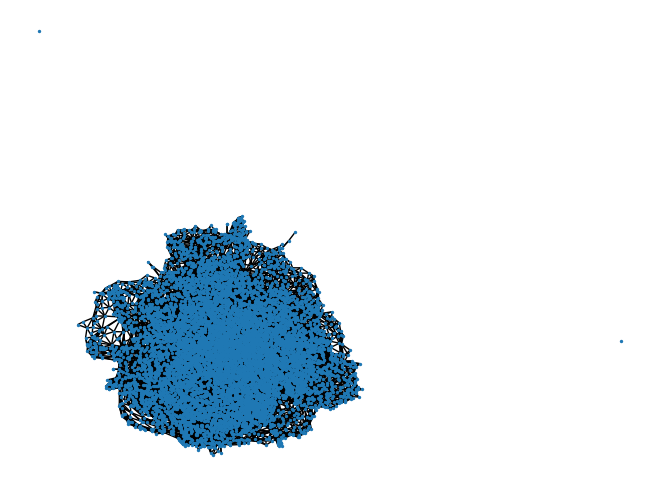

In [ ]:
nx.draw(G, node_size=2)

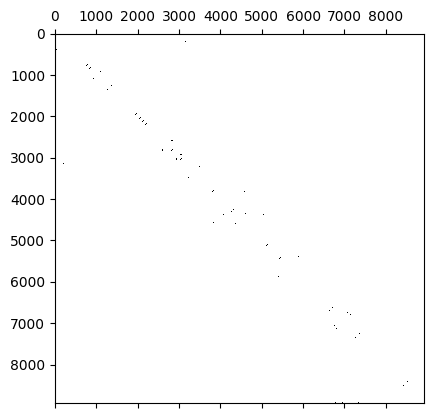

In [11]:
plt.spy(A)

In [ ]:
precinct = []
deg = []
for p, d in G.degree():
    precinct.append(p)
    deg.append(d)
geodf["degree"] = deg

In [ ]:
## add area column
geodf['area'] = [gpd.GeoSeries([geodf.loc[i, 'geometry']]).area[0] for i in geodf.index]
## add perimiter column
geodf['perimiter'] = [gpd.GeoSeries([geodf.loc[i, 'geometry']]).length[0] for i in geodf.index]
## add perimiter/area column - 'rurality/urbanity'
# GitHub Pages
# https://jblindsay.github.io › ghrg › Whitebox › Help
# The perimeter-area ratio is an indicator of polygon shape complexity. Unlike some other shape parameters (e.g. shape complexity index)
geodf['urbanity'] = geodf['perimiter'] / geodf['area']

<Axes: >

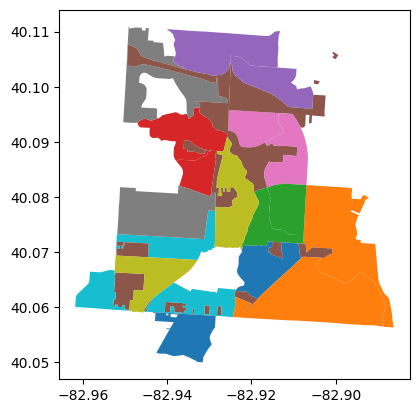

In [ ]:
geodf[geodf['county_pre'].isin([i for i in G.neighbors("FRANKLINAYL")] + ["FRANKLINAYL"])].plot(column="county_pre")

<Axes: >

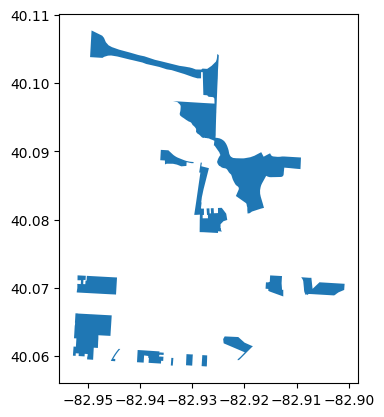

In [ ]:
geodf[geodf['county_pre'].isin(["FRANKLINAYL"])].plot(column="county_pre")

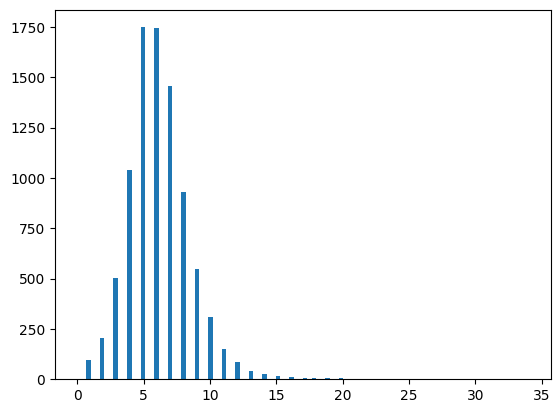

In [ ]:
plt.hist([d for i, d in G.degree()], bins=100);

<Axes: >

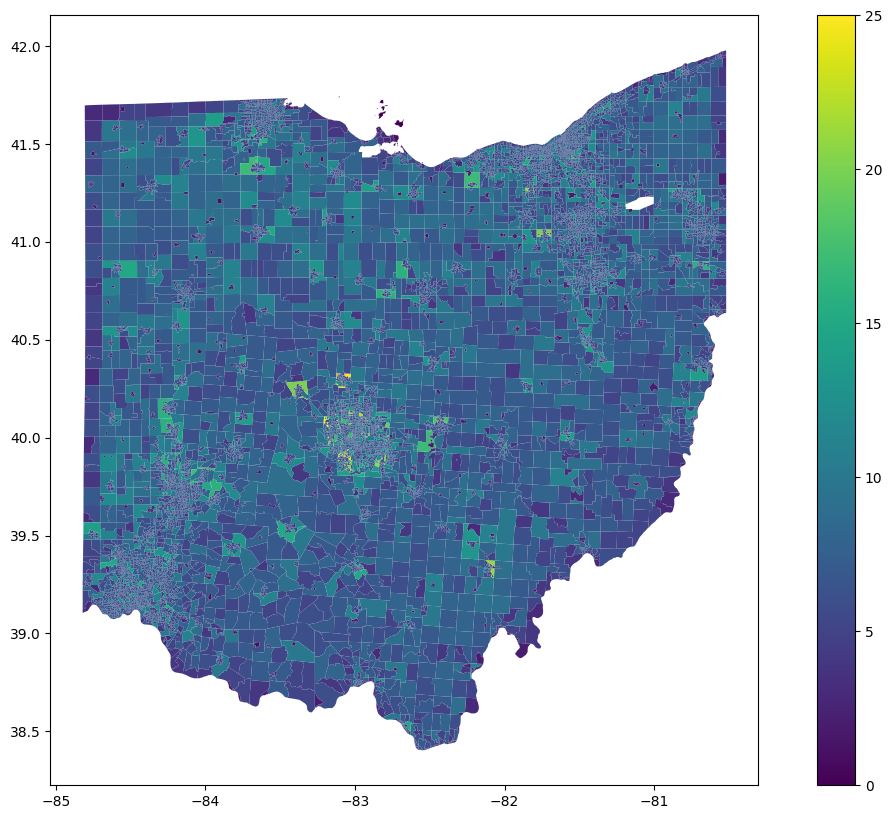

In [ ]:
geodf.plot(column="degree", figsize=(15, 10), cmap="viridis", vmax=25, legend=True)

<Axes: >

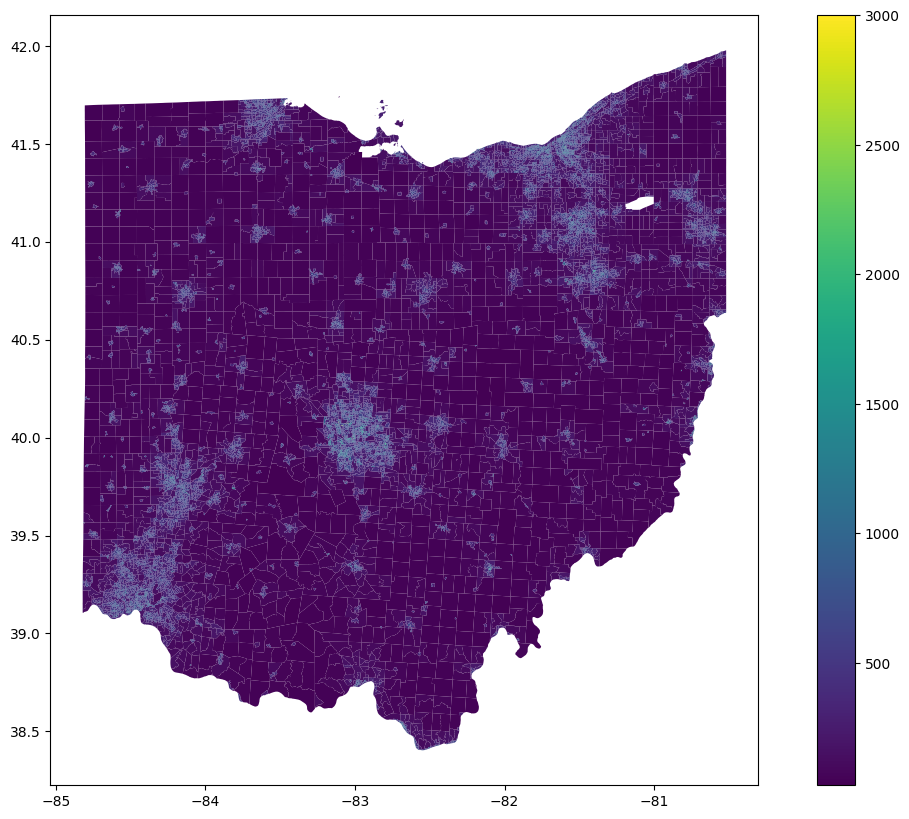

In [ ]:
geodf.plot(column="urbanity", figsize=(15, 10), cmap="viridis", legend=True, vmax=3000)